<a href="https://colab.research.google.com/github/Salma-shaik2003/Airlines-Market-Insights-and-Pricing-Analysis/blob/main/Food_Nutrition_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FoodNutrition Bot

**1. Install Required Libraries**

In [ ]:
!pip install transformers sentencepiece torch datasets


**2. Import Libraries**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch


**3. Load AI Model (FLAN-T5 for Nutrition Q&A)**

In [ ]:
model_name = "google/flan-t5-base"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

**4. Rule-Based Nutrition Data (for calorie prediction)**

In [ ]:
nutrition_data = {
    "apple": 52,
    "banana": 89,
    "rice": 130,
    "egg": 78,
    "milk": 42,
    "bread": 75,
    "chicken": 239,
    "idly": 60,
    "dosa": 133,
    "chapati": 120,
}


**5. Rule-Based Functions**

**Calorie prediction**

In [ ]:
def get_calories(food):
    food = food.lower()
    return nutrition_data.get(food, None)


**6. AI Response Function**

In [ ]:
def ai_answer(prompt):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(**inputs, max_length=200)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)


**7. Main Chatbot Logic**

In [ ]:
def food_nutrition_bot(user_input):

    # 1. Check if user asked calories
    for food in nutrition_data.keys():
        if food in user_input.lower():
            calories = get_calories(food)
            if calories:
                return f"🍎 {food.capitalize()} contains **{calories} calories** per 100g."

    # 2. AI general nutrition Q&A
    prompt = f"You are a nutrition expert. Answer simply: {user_input}"
    return ai_answer(prompt)


**8. Chat Loop**

In [ ]:
print("🍏 FoodNutrition Bot is ready! Ask me anything about food & health.")

while True:
    user = input("\nYou: ")
    if user.lower() in ["exit", "quit"]:
        print("Bot: Goodbye! Stay healthy! 🥗")
        break

    response = food_nutrition_bot(user)
    print("Bot:", response)


🍏 FoodNutrition Bot is ready! Ask me anything about food & health.

You: how many calories in banana?
Bot: 🍎 Banana contains **89 calories** per 100g.

You: suggest a healthy breakfast.
Bot: I'm a nutrition expert.

You: Give me a weight loss meal plan.
Bot: I'm a nutrition expert.

You: Is rice healthy?
Bot: 🍎 Rice contains **130 calories** per 100g.

You: how many calories in sapodilla?
Bot: 190

You: ok thank you
Bot: I'll be in touch.

You: ok
Bot: I'm a nutrition expert.

You: exit
Bot: Goodbye! Stay healthy! 🥗


Data visualization

In [ ]:
import matplotlib.pyplot as plt

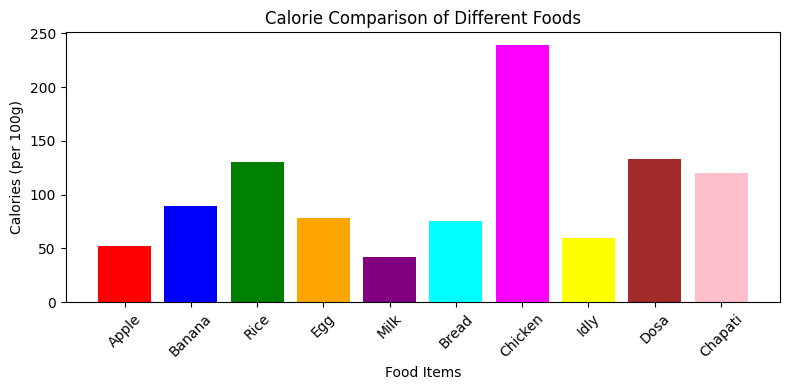

In [ ]:
# Split keys and values
foods = list(nutrition_data.keys())
calories = list(nutrition_data.values())

# Create a list of unique colors
colors = [
    "red", "blue", "green", "orange", "purple",
    "cyan", "magenta", "yellow", "brown", "pink"
]

# Plot Bar Chart
plt.figure(figsize=(8,4))
plt.bar(foods, calories, color=colors)
plt.xlabel("Food Items")
plt.ylabel("Calories (per 100g)")
plt.title("Calorie Comparison of Different Foods")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
